In [4]:
import numpy as np
import h5py
from itertools import product
from recipes import set_recipe_v2
import matplotlib.pyplot as plt
from analysis import compute_accum_error

# Example test

<IPython.core.display.Javascript object>


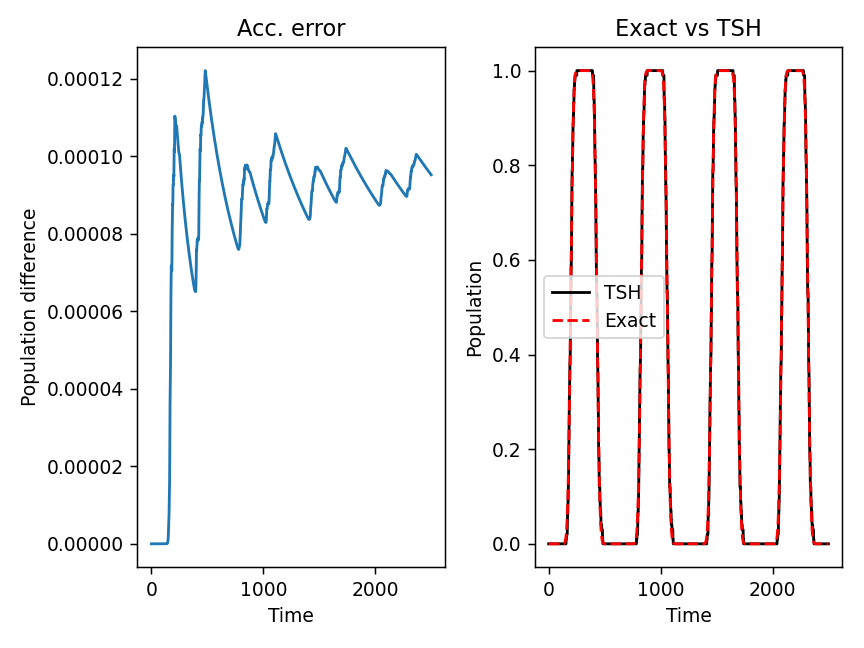

In [5]:
%matplotlib notebook
x1, x2, acc_err = compute_accum_error('test_model_0_icond_2_case_0_tsh__FSSH__BCSH__Schwartz1__E+__expplicit__noSSY/mem_data.hdf',
                             'exact-model-0-istate-1-dt-10.0-dx-0.025-nsteps-2500/data.hdf', istate_exact=1, istate_model=1)
plt.figure()
plt.subplot(1,2,1)
plt.plot(acc_err)
plt.title('Acc. error')
plt.xlabel('Time')
plt.ylabel('Population difference')
plt.subplot(1,2,2)
plt.plot(x1, color='k',ls='-', label='TSH')
plt.plot(x2, color='r',ls='--', label='Exact')
plt.title('Exact vs TSH')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.tight_layout()

# Comparison of hop acceptance algorithms
## 1. FSSH
### 1.1 Exact vs TSH 

<IPython.core.display.Javascript object>


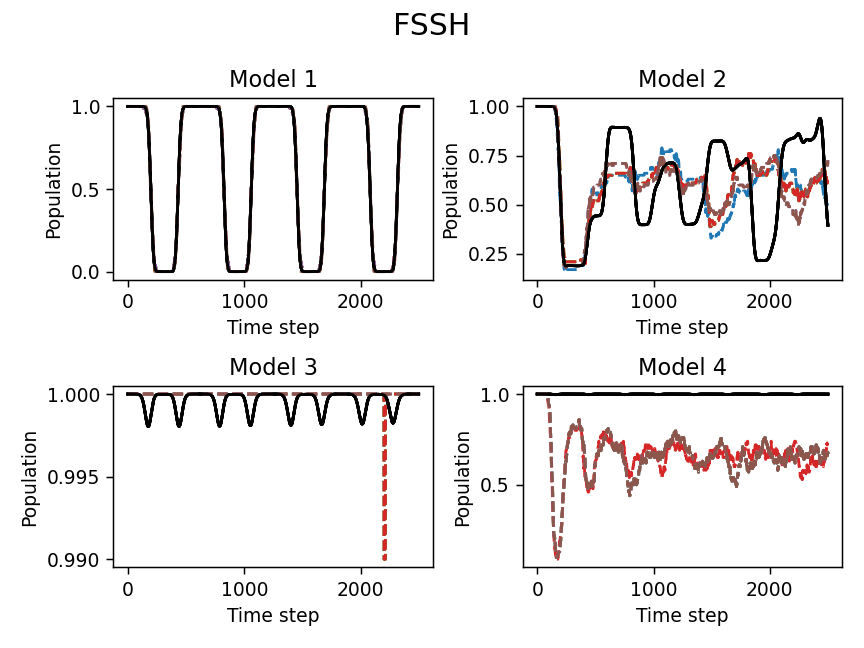

In [28]:
%matplotlib notebook
fig, ax = plt.subplots(2, 2)
plt.clf()
#============================== Manual set 1: Hop acceptance methods without decoherence
models = [0,1,2,3]
#======= Initial conditions, Both coords and momenta are sampled, istate=[1,0]
iconds = [2]
#======= Adiabatic initialization, Adiabatic TDSE
reps    = [0]
#======= TSH
tsh_ehr = [0]
#======= FSSH
fig.suptitle('FSSH', fontsize=16)
sh_opt = [1]
#======= No decoherence
deco_opt = [0]
#======= Decoherence time option
deco_time_opt = [0]
#======= E+, E-, D+, D-, F+, F-
hop_acc = [0,1,2,3,4,5]
#======= NAC calculations type, Explicit
nac_update = [0]
#======= SSY correction
ssy = [0]

for c, model in enumerate(models):
    # Make the recipes as below so that we can feed through Python arg parser
    recipes = list(product([model], iconds, reps, tsh_ehr, sh_opt, deco_opt, deco_time_opt, hop_acc, nac_update, ssy))
    plt.subplot(2,2,c+1)
    for i in range(len(recipes)):
        recipe = ''
        for j in range(len(recipes[i])):
            recipe += str(recipes[i][j])
        recipe_int = [int(d) for d in recipe]
        _, _, _, _, name = set_recipe_v2({}, recipe_int, name="test")
        x1, x2, acc_err = compute_accum_error(F'{name}/mem_data.hdf', 
                                            F'exact-model-{model}-istate-0-dt-10.0-dx-0.025-nsteps-2500/data.hdf', 
                                            istate_exact=0, istate_model=0)
        plt.plot(x1, ls='--')
        plt.plot(x2, color='k',ls='-')
    plt.title(F'Model {model+1}')
    #plt.legend()
    plt.ylabel('Population')
    plt.xlabel('Time step')
plt.tight_layout()

### 1.2 Hop acceptance comparison

<IPython.core.display.Javascript object>


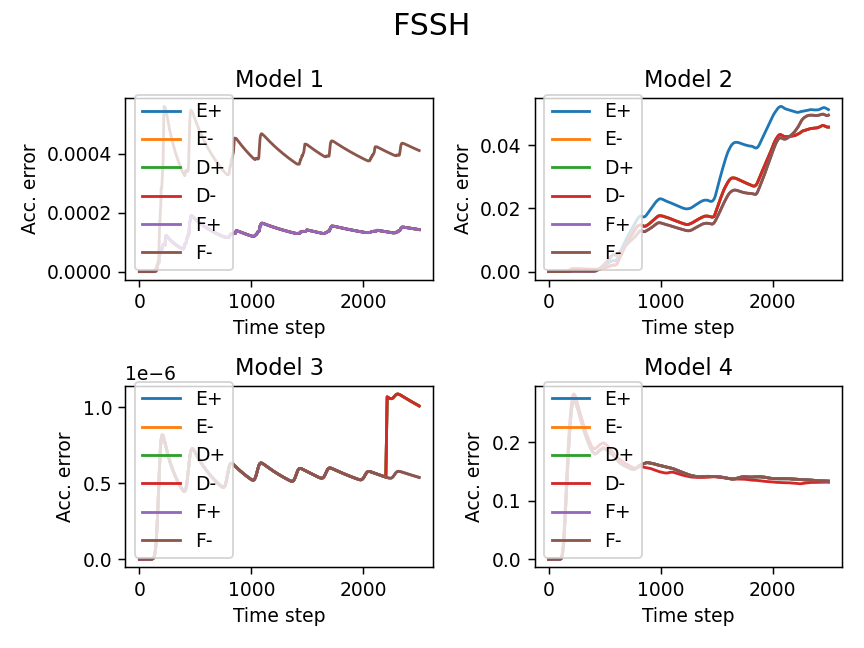

In [24]:
%matplotlib notebook
fig, ax = plt.subplots(2, 2)
plt.clf()
#============================== Manual set 1: Hop acceptance methods without decoherence
models = [0,1,2,3]
#======= Initial conditions, Both coords and momenta are sampled, istate=[1,0]
iconds = [2]
#======= Adiabatic initialization, Adiabatic TDSE
reps    = [0]
#======= TSH
tsh_ehr = [0]
#======= FSSH
fig.suptitle('FSSH', fontsize=16)
sh_opt = [1]
#======= No decoherence
deco_opt = [0]
#======= Decoherence time option
deco_time_opt = [0]
#======= E+, E-, D+, D-, F+, F-
hop_acc = [0,1,2,3,4,5]
#======= NAC calculations type, Explicit
nac_update = [0]
#======= SSY correction
ssy = [0]
labels = ['E+','E-','D+','D-','F+','F-']
for c, model in enumerate(models):
    # Make the recipes as below so that we can feed through Python arg parser
    recipes = list(product([model], iconds, reps, tsh_ehr, sh_opt, deco_opt, deco_time_opt, hop_acc, nac_update, ssy))
    plt.subplot(2,2,c+1)
    for i in range(len(recipes)):
        recipe = ''
        for j in range(len(recipes[i])):
            recipe += str(recipes[i][j])
        recipe_int = [int(d) for d in recipe]
        _, _, _, _, name = set_recipe_v2({}, recipe_int, name="test")
        x1, x2, acc_err = compute_accum_error(F'{name}/mem_data.hdf', 
                                            F'exact-model-{model}-istate-0-dt-10.0-dx-0.025-nsteps-2500/data.hdf', 
                                            istate_exact=0, istate_model=0)
        plt.plot(acc_err, label=labels[i])
    plt.title(F'Model {model+1}')
    plt.legend()
    plt.ylabel('Acc. error')
    plt.xlabel('Time step')
plt.tight_layout()

# Comparison of hop acceptance 
## 2. GFSH
### 2.1 Exact vs TSH

<IPython.core.display.Javascript object>


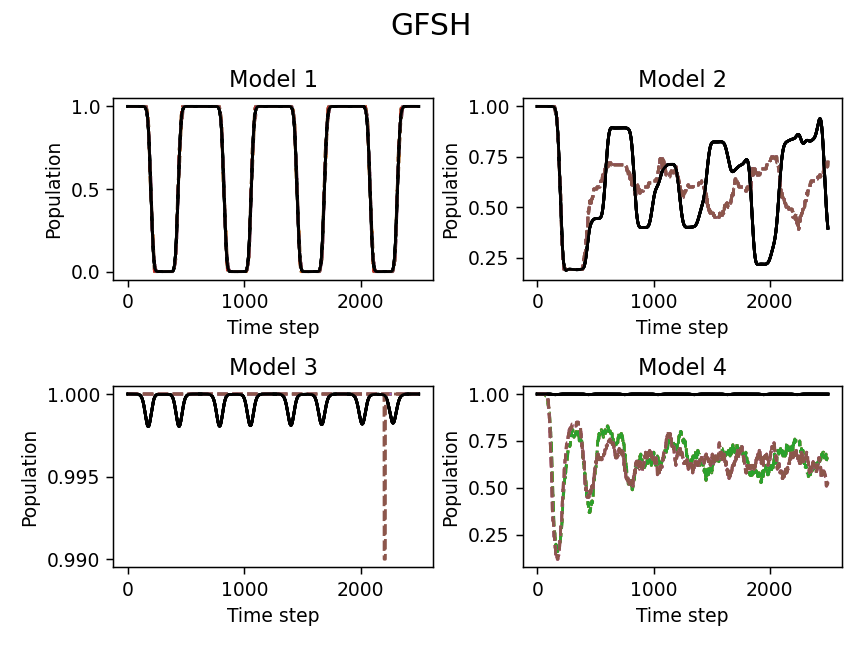

In [27]:
%matplotlib notebook
fig, ax = plt.subplots(2, 2)
plt.clf()
#============================== Manual set 1: Hop acceptance methods without decoherence
models = [0,1,2,3]
#======= Initial conditions, Both coords and momenta are sampled, istate=[1,0]
iconds = [2]
#======= Adiabatic initialization, Adiabatic TDSE
reps    = [0]
#======= TSH
tsh_ehr = [0]
#======= GFSH
fig.suptitle('GFSH', fontsize=16)
sh_opt = [2]
#======= No decoherence
deco_opt = [0]
#======= Decoherence time option
deco_time_opt = [0]
#======= E+, E-, D+, D-, F+, F-
hop_acc = [0,1,2,3,4,5]
#======= NAC calculations type, Explicit
nac_update = [0]
#======= SSY correction
ssy = [0]

for c, model in enumerate(models):
    # Make the recipes as below so that we can feed through Python arg parser
    recipes = list(product([model], iconds, reps, tsh_ehr, sh_opt, deco_opt, deco_time_opt, hop_acc, nac_update, ssy))
    plt.subplot(2,2,c+1)
    for i in range(len(recipes)):
        recipe = ''
        for j in range(len(recipes[i])):
            recipe += str(recipes[i][j])
        recipe_int = [int(d) for d in recipe]
        _, _, _, _, name = set_recipe_v2({}, recipe_int, name="test")
        x1, x2, acc_err = compute_accum_error(F'{name}/mem_data.hdf', 
                                            F'exact-model-{model}-istate-0-dt-10.0-dx-0.025-nsteps-2500/data.hdf', 
                                            istate_exact=0, istate_model=0)
        plt.plot(x1, ls='--')
        plt.plot(x2, color='k',ls='-')
    plt.title(F'Model {model+1}')
    #plt.legend()
    plt.ylabel('Population')
    plt.xlabel('Time step')
plt.tight_layout()

### 2.2 Hop acceptance comparison

<IPython.core.display.Javascript object>


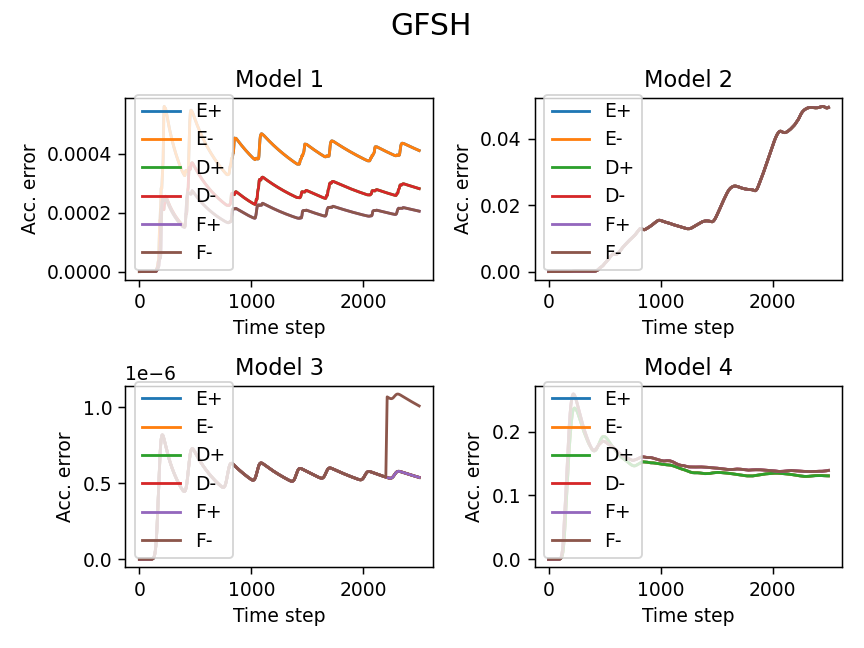

In [30]:
%matplotlib notebook
fig, ax = plt.subplots(2, 2)
plt.clf()
#============================== Manual set 1: Hop acceptance methods without decoherence
models = [0,1,2,3]
#======= Initial conditions, Both coords and momenta are sampled, istate=[1,0]
iconds = [2]
#======= Adiabatic initialization, Adiabatic TDSE
reps    = [0]
#======= TSH
tsh_ehr = [0]
#======= GFSH
fig.suptitle('GFSH', fontsize=16)
sh_opt = [2]
#======= No decoherence
deco_opt = [0]
#======= Decoherence time option
deco_time_opt = [0]
#======= E+, E-, D+, D-, F+, F-
hop_acc = [0,1,2,3,4,5]
#======= NAC calculations type, Explicit
nac_update = [0]
#======= SSY correction
ssy = [0]
labels = ['E+','E-','D+','D-','F+','F-']
for c, model in enumerate(models):
    # Make the recipes as below so that we can feed through Python arg parser
    recipes = list(product([model], iconds, reps, tsh_ehr, sh_opt, deco_opt, deco_time_opt, hop_acc, nac_update, ssy))
    plt.subplot(2,2,c+1)
    for i in range(len(recipes)):
        recipe = ''
        for j in range(len(recipes[i])):
            recipe += str(recipes[i][j])
        recipe_int = [int(d) for d in recipe]
        _, _, _, _, name = set_recipe_v2({}, recipe_int, name="test")
        x1, x2, acc_err = compute_accum_error(F'{name}/mem_data.hdf', 
                                            F'exact-model-{model}-istate-0-dt-10.0-dx-0.025-nsteps-2500/data.hdf', 
                                            istate_exact=0, istate_model=0)
        plt.plot(acc_err, label=labels[i])
    plt.title(F'Model {model+1}')
    plt.legend()
    plt.ylabel('Acc. error')
    plt.xlabel('Time step')
plt.tight_layout()

# Comparison of hop acceptance 
## 3. MSSH
### 3.1 Exact vs TSH

<IPython.core.display.Javascript object>


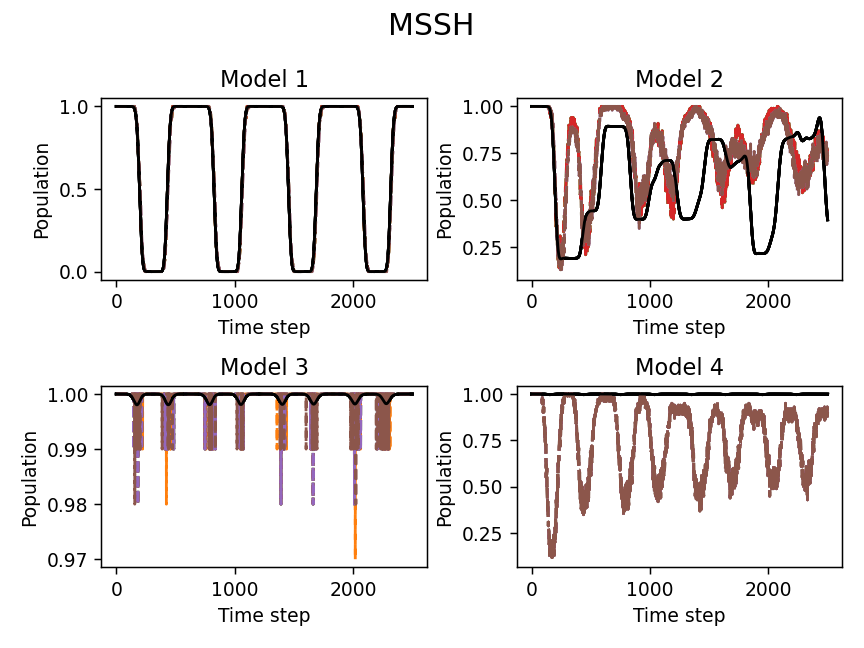

In [31]:
%matplotlib notebook
fig, ax = plt.subplots(2, 2)
plt.clf()
#============================== Manual set 1: Hop acceptance methods without decoherence
models = [0,1,2,3]
#======= Initial conditions, Both coords and momenta are sampled, istate=[1,0]
iconds = [2]
#======= Adiabatic initialization, Adiabatic TDSE
reps    = [0]
#======= TSH
tsh_ehr = [0]
#======= MSSH
fig.suptitle('MSSH', fontsize=16)
sh_opt = [3]
#======= No decoherence
deco_opt = [0]
#======= Decoherence time option
deco_time_opt = [0]
#======= E+, E-, D+, D-, F+, F-
hop_acc = [0,1,2,3,4,5]
#======= NAC calculations type, Explicit
nac_update = [0]
#======= SSY correction
ssy = [0]

for c, model in enumerate(models):
    # Make the recipes as below so that we can feed through Python arg parser
    recipes = list(product([model], iconds, reps, tsh_ehr, sh_opt, deco_opt, deco_time_opt, hop_acc, nac_update, ssy))
    plt.subplot(2,2,c+1)
    for i in range(len(recipes)):
        recipe = ''
        for j in range(len(recipes[i])):
            recipe += str(recipes[i][j])
        recipe_int = [int(d) for d in recipe]
        _, _, _, _, name = set_recipe_v2({}, recipe_int, name="test")
        x1, x2, acc_err = compute_accum_error(F'{name}/mem_data.hdf', 
                                            F'exact-model-{model}-istate-0-dt-10.0-dx-0.025-nsteps-2500/data.hdf', 
                                            istate_exact=0, istate_model=0)
        plt.plot(x1, ls='--')
        plt.plot(x2, color='k',ls='-')
    plt.title(F'Model {model+1}')
    #plt.legend()
    plt.ylabel('Population')
    plt.xlabel('Time step')
plt.tight_layout()

### 3.2 Hop acceptance comparison

<IPython.core.display.Javascript object>


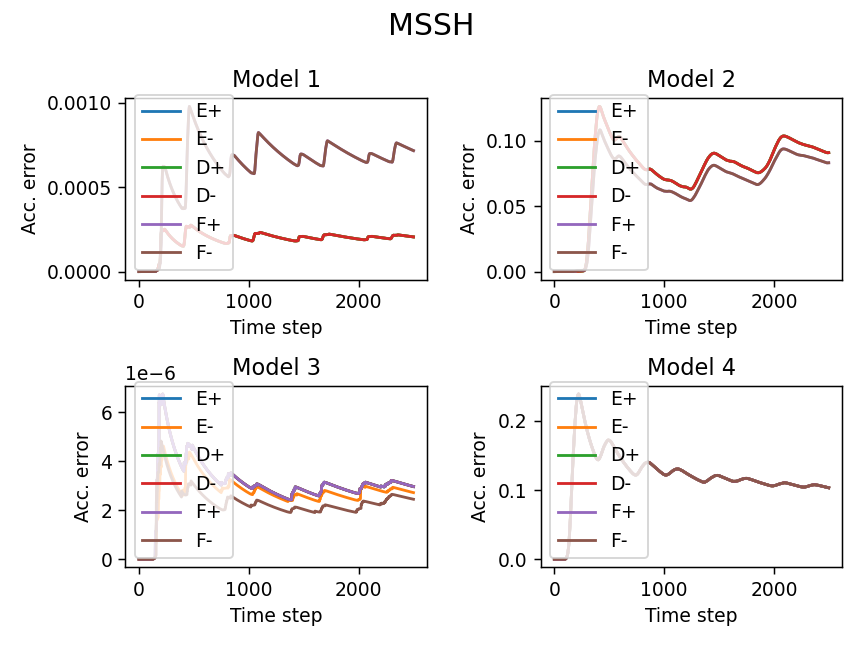

In [32]:
%matplotlib notebook
fig, ax = plt.subplots(2, 2)
plt.clf()
#============================== Manual set 1: Hop acceptance methods without decoherence
models = [0,1,2,3]
#======= Initial conditions, Both coords and momenta are sampled, istate=[1,0]
iconds = [2]
#======= Adiabatic initialization, Adiabatic TDSE
reps    = [0]
#======= TSH
tsh_ehr = [0]
#======= MSSH
fig.suptitle('MSSH', fontsize=16)
sh_opt = [3]
#======= No decoherence
deco_opt = [0]
#======= Decoherence time option
deco_time_opt = [0]
#======= E+, E-, D+, D-, F+, F-
hop_acc = [0,1,2,3,4,5]
#======= NAC calculations type, Explicit
nac_update = [0]
#======= SSY correction
ssy = [0]
labels = ['E+','E-','D+','D-','F+','F-']
for c, model in enumerate(models):
    # Make the recipes as below so that we can feed through Python arg parser
    recipes = list(product([model], iconds, reps, tsh_ehr, sh_opt, deco_opt, deco_time_opt, hop_acc, nac_update, ssy))
    plt.subplot(2,2,c+1)
    for i in range(len(recipes)):
        recipe = ''
        for j in range(len(recipes[i])):
            recipe += str(recipes[i][j])
        recipe_int = [int(d) for d in recipe]
        _, _, _, _, name = set_recipe_v2({}, recipe_int, name="test")
        x1, x2, acc_err = compute_accum_error(F'{name}/mem_data.hdf', 
                                            F'exact-model-{model}-istate-0-dt-10.0-dx-0.025-nsteps-2500/data.hdf', 
                                            istate_exact=0, istate_model=0)
        plt.plot(acc_err, label=labels[i])
    plt.title(F'Model {model+1}')
    plt.legend()
    plt.ylabel('Acc. error')
    plt.xlabel('Time step')
plt.tight_layout()

# Comparison of Decoherence methods

<IPython.core.display.Javascript object>


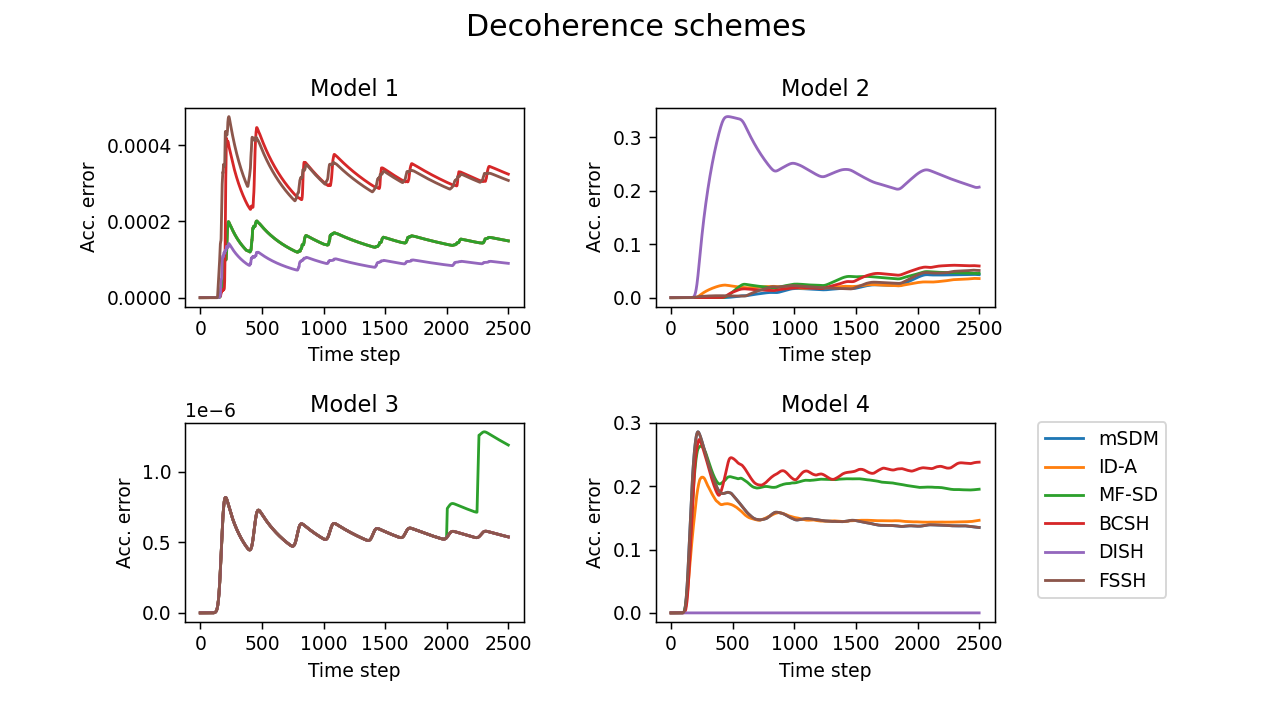

In [52]:
%matplotlib notebook
fig, ax = plt.subplots(2, 2)
plt.clf()
#============================== Manual set 1: Hop acceptance methods without decoherence
models = [0,1,2,3]
#======= Initial conditions, Both coords and momenta are sampled, istate=[1,0]
iconds = [2]
#======= Adiabatic initialization, Adiabatic TDSE
reps    = [0]
#======= TSH
tsh_ehr = [0]
#======= FSSH
fig.suptitle('Decoherence schemes', fontsize=16)
sh_opt = [1]
#======= No decoherence
deco_opt = [1,2,3,4]
#======= Decoherence time option
deco_time_opt = [2]
#======= E+
hop_acc = [0]
#======= NAC calculations type, Explicit
nac_update = [0]
#======= SSY correction
ssy = [0]
labels = ['mSDM','ID-A','MF-SD','BCSH','DISH','FSSH']
for c, model in enumerate(models):
    # Make the recipes as below so that we can feed through Python arg parser
    recipes = list(product([model], iconds, reps, tsh_ehr, sh_opt, deco_opt, deco_time_opt, hop_acc, nac_update, ssy))
    # Append DISH manusally
    recipes.append((model,2,0,0,6,0,0,0,0,0))
    # Append FSSH manusally
    recipes.append((model,2,0,0,1,0,0,0,0,0))

    plt.subplot(2,2,c+1)
    for i in range(len(recipes)):
        recipe = ''
        for j in range(len(recipes[i])):
            recipe += str(recipes[i][j])
        recipe_int = [int(d) for d in recipe]
        _, _, _, _, name = set_recipe_v2({}, recipe_int, name="test")
        x1, x2, acc_err = compute_accum_error(F'{name}/mem_data.hdf', 
                                            F'exact-model-{model}-istate-0-dt-10.0-dx-0.025-nsteps-2500/data.hdf', 
                                            istate_exact=0, istate_model=0)
        plt.plot(acc_err, label=labels[i])
        #plt.plot(x1, ls='--')
        #plt.plot(x2, color='k', ls='-')
    plt.title(F'Model {model+1}')
    if model==3:
        plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('Acc. error')
    plt.xlabel('Time step')
plt.tight_layout()